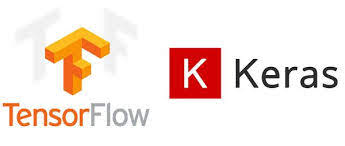

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
import matplotlib.pyplot as plt

<h3>Data reshaping and sampling<h3>

In [19]:
df=pd.read_csv("breast-cancer-wisconsin.csv",sep=';')



for i in range(0,len(df)):
    if df.iat[i, 10]==2:
        df.iat[i,10]=0
    else:
        df.iat[i,10]=1
        
for i in range(0,len(df)):
    if df.iat[i, 10] !=1 and df.iat[i, 10] !=0:
        pass
        

ytrain=df["Column11"].to_numpy()
xtrain=df.to_numpy()
df=df.drop(["Column7"],axis=1)

xtrain=df.to_numpy()

sc=preprocessing.MinMaxScaler()
xtrain=sc.fit_transform(xtrain)

from sklearn.utils import shuffle
Xtrain,ytrain = shuffle(xtrain,ytrain, random_state=0)


from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(Xtrain,ytrain, test_size=0.2, random_state=42)



<h3> Model building<h3>

In [20]:
mon_modele = keras.Sequential()
mon_modele.add(keras.Input(shape=(10)))
mon_modele.add(layers.Dense(2, activation='relu', name="layer1"))
mon_modele.add(layers.Dense(2, activation='relu', name="layer2"))
mon_modele.add(layers.Dense(1, activation='sigmoid', name="layer3"))
mon_modele.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 2)                 22        
_________________________________________________________________
layer2 (Dense)               (None, 2)                 6         
_________________________________________________________________
layer3 (Dense)               (None, 1)                 3         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


<h3> Model training<h3>

In [21]:
mon_modele.compile(optimizer = Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics =['accuracy'])

history=mon_modele.fit(x=feature_train,y=target_train,validation_split=0.2,epochs=1000,shuffle=True,verbose=2)


Epoch 1/1000
14/14 - 0s - loss: 0.6924 - accuracy: 0.6488 - val_loss: 0.6930 - val_accuracy: 0.6250
Epoch 2/1000
14/14 - 0s - loss: 0.6921 - accuracy: 0.6510 - val_loss: 0.6928 - val_accuracy: 0.6250
Epoch 3/1000
14/14 - 0s - loss: 0.6917 - accuracy: 0.6510 - val_loss: 0.6926 - val_accuracy: 0.6250
Epoch 4/1000
14/14 - 0s - loss: 0.6914 - accuracy: 0.6532 - val_loss: 0.6923 - val_accuracy: 0.6250
Epoch 5/1000
14/14 - 0s - loss: 0.6911 - accuracy: 0.6555 - val_loss: 0.6921 - val_accuracy: 0.6339
Epoch 6/1000
14/14 - 0s - loss: 0.6908 - accuracy: 0.6555 - val_loss: 0.6919 - val_accuracy: 0.6339
Epoch 7/1000
14/14 - 0s - loss: 0.6905 - accuracy: 0.6555 - val_loss: 0.6916 - val_accuracy: 0.6339
Epoch 8/1000
14/14 - 0s - loss: 0.6901 - accuracy: 0.6555 - val_loss: 0.6913 - val_accuracy: 0.6339
Epoch 9/1000
14/14 - 0s - loss: 0.6896 - accuracy: 0.6555 - val_loss: 0.6908 - val_accuracy: 0.6339
Epoch 10/1000
14/14 - 0s - loss: 0.6892 - accuracy: 0.6555 - val_loss: 0.6904 - val_accuracy: 0.6339

<h3> Model evaluation<h3>

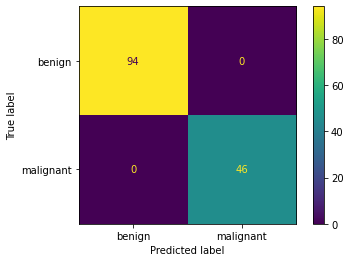

In [22]:
predictions = mon_modele.predict(feature_test)
rounded_predictions = np.round(predictions,0)
cm = confusion_matrix(target_test,rounded_predictions)
class_names=["benign","malignant"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()